In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import operator
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.preprocessing import MinMaxScaler

In [2]:
col=["c_type", "lifestyle", "vacation", "credit", "salary", "property_value", "class"]

In [3]:
train_data=pd.read_csv("trainProdSelection.arff", delimiter="\t")
test_data=pd.read_csv("testProdSelection.arff",delimiter="\t")

In [4]:
train_data.columns=col

In [5]:
train_data.head()
train_data.shape

(185, 7)

In [6]:
test_data.columns=col
test_data.head()

,c_type,lifestyle,vacation,credit,salary,property_value,class
0,student,spend>>saving,29,10,16.1900,2.4839,C1
1,student,spend<<saving,28,60,15.4600,1.1885,C1
2,engineer,spend>saving,15,41,21.2600,1.4379,C1
3,librarian,spend<saving,2,9,19.7207,0.6913,C1
4,librarian,spend>saving,7,9,12.7098,1.4728,C1


In [7]:
train_data.describe()

,vacation,credit,salary,property_value
count,185.000000,185.000000,185.000000,185.000000
mean,27.691892,62.783784,20.702852,4.146650
std,18.572630,69.120537,4.244655,3.775707
min,1.000000,3.000000,8.507600,0.008000
25%,9.000000,15.000000,18.594400,1.644700
50%,26.000000,45.000000,20.390000,2.897200
75%,48.000000,72.000000,22.790000,4.838800
max,64.000000,347.000000,31.750000,17.873700


In [8]:
test_data.head()

,c_type,lifestyle,vacation,credit,salary,property_value,class
0,student,spend>>saving,29,10,16.1900,2.4839,C1
1,student,spend<<saving,28,60,15.4600,1.1885,C1
2,engineer,spend>saving,15,41,21.2600,1.4379,C1
3,librarian,spend<saving,2,9,19.7207,0.6913,C1
4,librarian,spend>saving,7,9,12.7098,1.4728,C1


In [9]:
train_data.dtypes

c_type             object
lifestyle          object
vacation            int64
credit              int64
salary            float64
property_value    float64
class              object
dtype: object

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
c_type            185 non-null object
lifestyle         185 non-null object
vacation          185 non-null int64
credit            185 non-null int64
salary            185 non-null float64
property_value    185 non-null float64
class             185 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 10.2+ KB


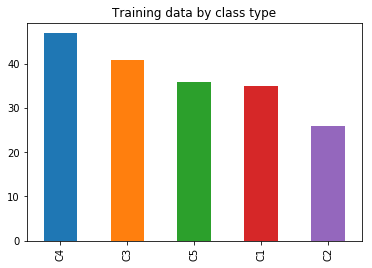

In [11]:
train_data['class'].value_counts().plot(kind='bar', title='Training data by class type')

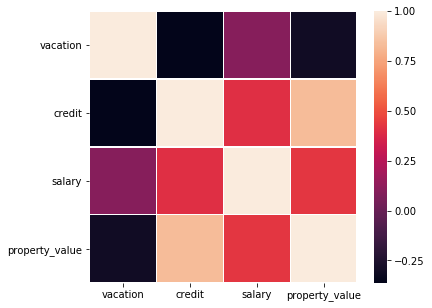

In [12]:
corrmat = train_data[1:].corr() 
f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

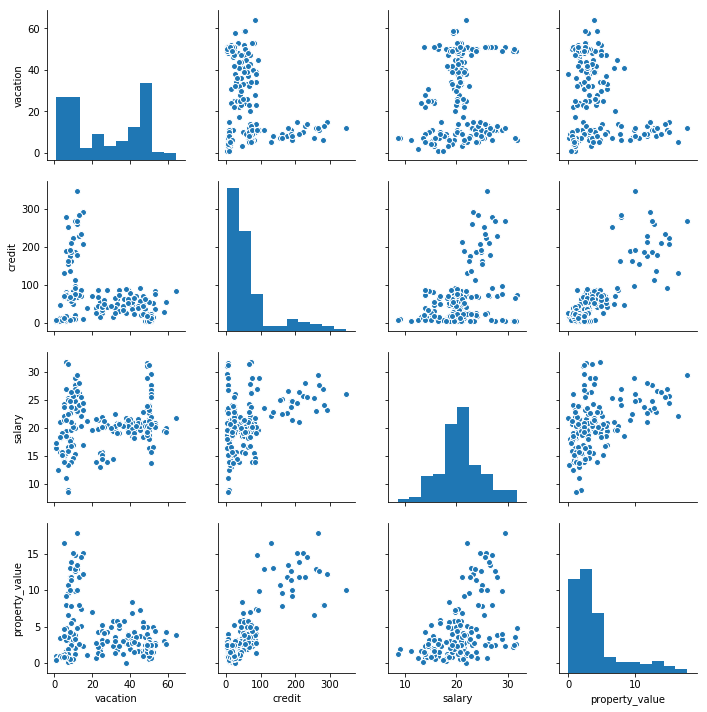

In [13]:
sns.pairplot(train_data)

In [14]:
train_encoded = pd.get_dummies(train_data[['c_type','lifestyle']],drop_first=True)
train_encoded.head()

,c_type_engineer,c_type_librarian,c_type_professor,c_type_student,lifestyle_spend<saving,lifestyle_spend>>saving,lifestyle_spend>saving
0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1
4,0,0,0,1,0,0,1


In [15]:
test_encoded = pd.get_dummies(test_data[['c_type','lifestyle']],drop_first=True)
test_encoded.head()

,c_type_engineer,c_type_librarian,c_type_professor,c_type_student,lifestyle_spend<saving,lifestyle_spend>>saving,lifestyle_spend>saving
0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1
3,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1


In [16]:
train_data = train_data.drop(['c_type','lifestyle'],axis=1)
train_data.head()

,vacation,credit,salary,property_value,class
0,11,21,15.32,2.0232,C1
1,7,64,16.55,3.1202,C1
2,3,47,15.71,3.4022,C1
3,15,10,16.96,2.2825,C1
4,6,80,15.50,3.7338,C1


In [17]:
test_data = test_data.drop(['c_type','lifestyle'],axis=1)
test_data.head()

,vacation,credit,salary,property_value,class
0,29,10,16.1900,2.4839,C1
1,28,60,15.4600,1.1885,C1
2,15,41,21.2600,1.4379,C1
3,2,9,19.7207,0.6913,C1
4,7,9,12.7098,1.4728,C1


In [18]:
train_data_encoded = pd.concat([train_data,train_encoded],axis=1)
train_data_encoded.head()

,vacation,credit,salary,property_value,class,c_type_engineer,c_type_librarian,c_type_professor,c_type_student,lifestyle_spend<saving,lifestyle_spend>>saving,lifestyle_spend>saving
0,11,21,15.32,2.0232,C1,0,0,0,1,0,0,1
1,7,64,16.55,3.1202,C1,0,0,0,1,0,0,1
2,3,47,15.71,3.4022,C1,0,0,0,1,0,0,1
3,15,10,16.96,2.2825,C1,0,0,0,1,0,0,1
4,6,80,15.50,3.7338,C1,0,0,0,1,0,0,1


In [19]:
test_data_encoded = pd.concat([test_data,train_encoded],axis=1)
test_data_encoded.head()

,vacation,credit,salary,property_value,class,c_type_engineer,c_type_librarian,c_type_professor,c_type_student,lifestyle_spend<saving,lifestyle_spend>>saving,lifestyle_spend>saving
0,29.0,10.0,16.1900,2.4839,C1,0,0,0,1,0,0,1
1,28.0,60.0,15.4600,1.1885,C1,0,0,0,1,0,0,1
2,15.0,41.0,21.2600,1.4379,C1,0,0,0,1,0,0,1
3,2.0,9.0,19.7207,0.6913,C1,0,0,0,1,0,0,1
4,7.0,9.0,12.7098,1.4728,C1,0,0,0,1,0,0,1


In [20]:
y_train = train_data_encoded['class']
y_test = test_data_encoded['class']

In [21]:
X_train = train_data_encoded.drop(["class"],axis=1)
X_test = test_data_encoded.drop(["class"],axis=1)

In [22]:
X_test = X_test[0:21]
y_test = y_test[0:21]

In [23]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [24]:
X_train.index=range(len(X_train))
y_train.index=range(len(y_train))
X_test.index=range(len(X_test))
y_test.index=range(len(y_test))

In [25]:
def distNeighbours(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(len(X_train.columns)):   
                eDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((eDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance
def predictOutputCategorical(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        votes={}
        for j in i:
            if j[-1] in votes.keys():
                votes[j[-1]]=votes[j[-1]]+1
            else:
                votes[j[-1]]=1
        responses.append(sorted(votes,key=votes.get,reverse=True)[0])
    return responses
def predictOutputNumeric(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        responses.append(mean)
    return responses
def getAccuracyCategorical(actual,predicted):
    correct=0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correct+=1
    return round((correct/len(actual))*100,2)
def getAccuracyNumeric(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=pow((actual[i]-predicted[i]),2)
    error=error/len(predicted)-1
    return 100-error
acc = []
for i in range(1,26):
  output = predictOutputCategorical(X_train,y_train,X_test,i)
  acc_i = getAccuracyCategorical(y_test,output)
  print("for k = ",i," accuracy = ",acc_i)
  acc.append(acc_i)

for k =  1  accuracy =  23.81
for k =  2  accuracy =  23.81
for k =  3  accuracy =  61.9
for k =  4  accuracy =  47.62
for k =  5  accuracy =  71.43
for k =  6  accuracy =  57.14
for k =  7  accuracy =  61.9
for k =  8  accuracy =  47.62
for k =  9  accuracy =  47.62
for k =  10  accuracy =  47.62
for k =  11  accuracy =  38.1
for k =  12  accuracy =  38.1
for k =  13  accuracy =  28.57
for k =  14  accuracy =  38.1
for k =  15  accuracy =  42.86
for k =  16  accuracy =  66.67
for k =  17  accuracy =  57.14
for k =  18  accuracy =  61.9
for k =  19  accuracy =  61.9
for k =  20  accuracy =  57.14
for k =  21  accuracy =  66.67
for k =  22  accuracy =  66.67
for k =  23  accuracy =  52.38
for k =  24  accuracy =  47.62
for k =  25  accuracy =  42.86


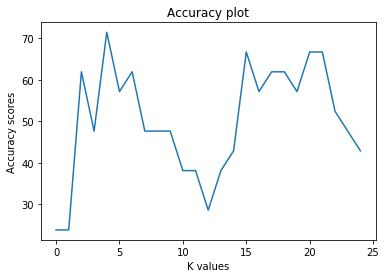

In [26]:
y_positions = range(25)
plt.plot(y_positions, acc)
plt.xlabel('K values')
plt.ylabel('Accuracy scores')
#title 
plt.title("Accuracy plot")
plt.show()